In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [32]:
def back_substitution(U, y):
    n = U.shape[1]
    x = np.zeros_like(y, dtype=np.double)
    x[-1] = y[-1] / U[-1, -1]
    for i in range(n - 2, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i:], x[i:])) / U[i, i]

    return x

def linsolve_qr(A, b):
    num_param = A.shape[1]
    q, r = scipy.linalg.qr(A) # Q*R*p = y
    return back_substitution(r[0:num_param], (q.T @ b)[0:num_param]) # solve for: R*p = Q.T * y


def gauss_newton(f, df, x, tolerance=1e-14, max_step=100):
    step = 0
    error = np.linalg.norm(f(x))
    while error > tolerance and step < max_step:
        # print(step, x, error)
        x += linsolve_qr(df(x), -f(x))
        error = np.linalg.norm(f(x))
        step += 1

    return x

In [33]:
p1 = [0, 5]
p2 = [4, -1]
p3 = [-2, -3]

# search for m, n, R
def f(p):
    (m, n, r) = p
    return np.array([
        (p1[0]-m)**2 + (p1[1]-n)**2 - r**2,
        (p2[0]-m)**2 + (p2[1]-n)**2 - r**2,
        (p3[0]-m)**2 + (p3[1]-n)**2 - r**2,
    ])

def df(p):
    (m, n, r) = p
    return np.array([
        [2 * (m - p1[0]), 2 * (n - p1[1]), -2 * r],
        [2 * (m - p2[0]), 2 * (n - p2[1]), -2 * r],
        [2 * (m - p3[0]), 2 * (n - p3[1]), -2 * r],
    ])

(m, n, r) = gauss_newton(f, df, np.array([1, 1, 1], dtype=np.float64))
print((m, n, r))

(0.0909090909090908, 0.7272727272727272, 4.273694281288421)


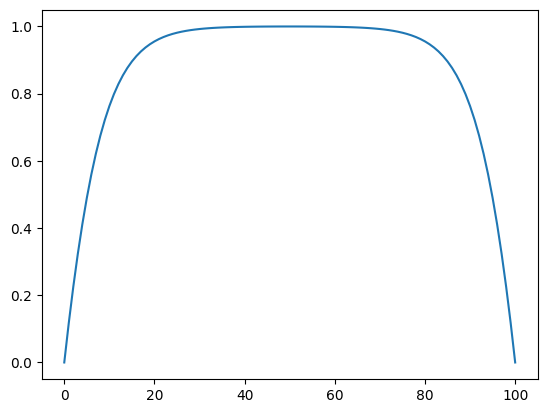

In [34]:
# example solve RWP
import numpy as np
import scipy.linalg

# Define parameters
epsilon = 1e-2
N = 100
h = 1 / N
x = np.linspace(0, 1, N+1)

def f(u):
    F = np.zeros(N-1)
    for j in range(1, N):
        F[j-1] = -epsilon * (u[j-1] - 2*u[j] + u[j+1]) / h**2 + u[j]**3 - 1
    return F

def df(u):
    J = np.zeros((N-1, N-1))
    for j in range(1, N):
        if j > 1:
            J[j-1, j-2] = -epsilon / h**2
        J[j-1, j-1] = 2*epsilon / h**2 + 3*u[j]**2
        if j < N-1:
            J[j-1, j] = -epsilon / h**2
    return J

# Define initial guess
u_initial = np.zeros(N+1)

# Use the given gauss_newton function to solve the system
def gauss_newton_solve(u_initial, tolerance=1e-14, max_step=100):
    u = u_initial.copy()
    u[1:-1] = gauss_newton(lambda v: f(np.concatenate(([0], v, [0]))), 
                           lambda v: df(np.concatenate(([0], v, [0]))), 
                           u[1:-1], tolerance, max_step)
    return u


# Solve the system
solution = gauss_newton_solve(u_initial)

plt.plot(solution)
plt.show()